# Aim 1

## おまじないパート

In [1]:
import sys
from pathlib import Path

# 現在のノートブックのパスを取得
notebook_dir = Path().resolve() 

# プロジェクトルートディレクトリ（notebooksディレクトリの親ディレクトリ）を取得
# プロジェクトルートは2階層上です
project_root = notebook_dir.parent.parent

# プロジェクトルートをPythonの検索パスに追加
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

In [2]:
from groom import GroomAim1, GroomAim1LinearTests,\
    save_to_parquet, load_from_parquet, save_model, load_model

In [3]:
self = GroomAim1()
# こっちは使わない
linear = GroomAim1LinearTests()

In [4]:
import pandas as pd

## BLと毛繕い行動との間に有意差があるか

### delta_dfの読み込み

In [5]:
raw_delta_df = load_from_parquet("../../data/preprocessed_data/temperature_delta_df.parquet")

--- 復元完了 ---
復元されたDataFrameのshape: (2625, 17)


### 初期300秒に限定

In [6]:
delta_df = raw_delta_df[(raw_delta_df['delta_time'] <= 300)].copy()

### 散布図の作成

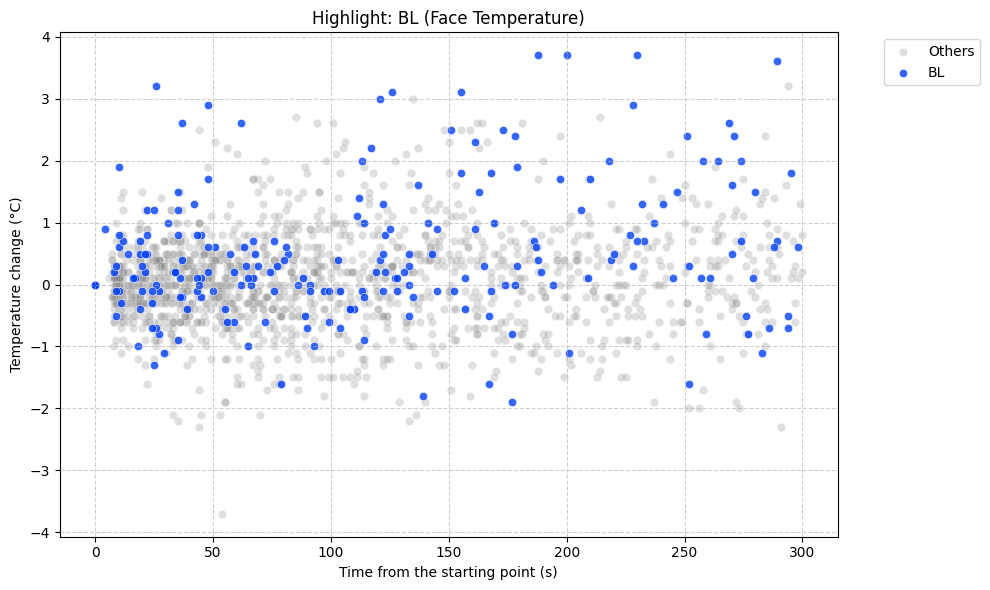

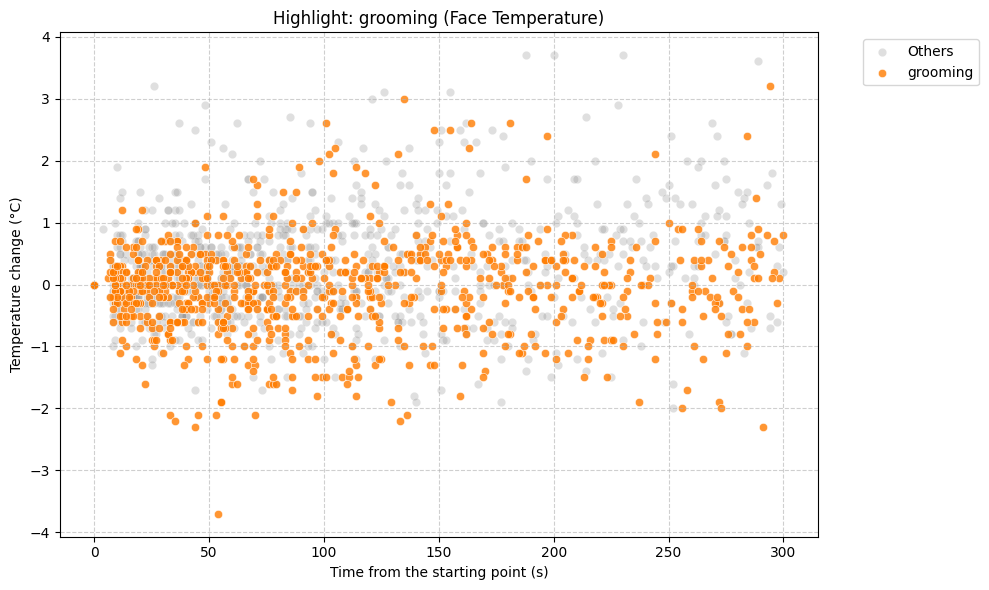

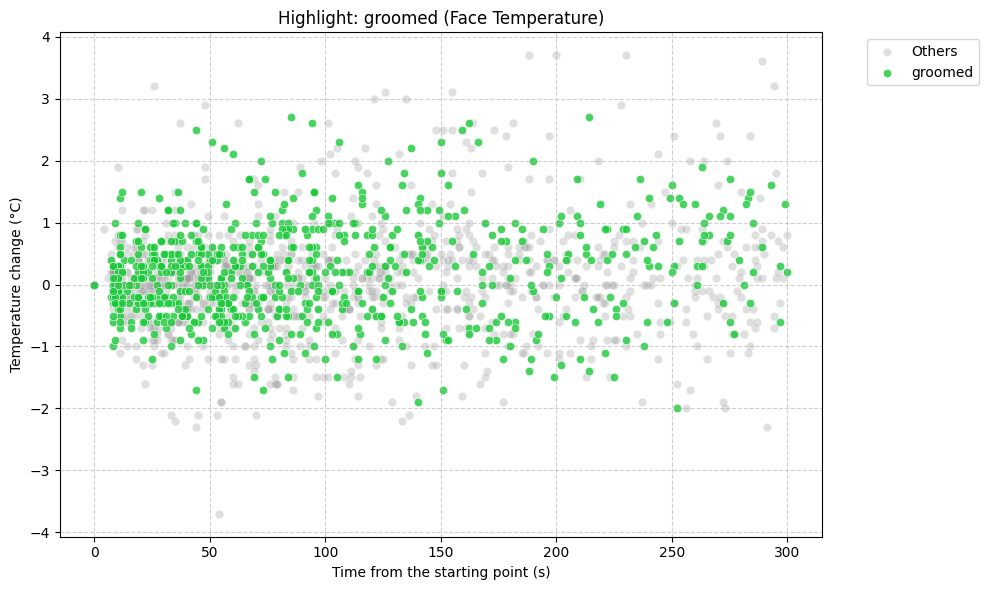

In [7]:
for behavior in delta_df['behavior'].unique():
    self.plot_highlight_behavior(delta_df, target_behavior=behavior, y_column='delta_face')

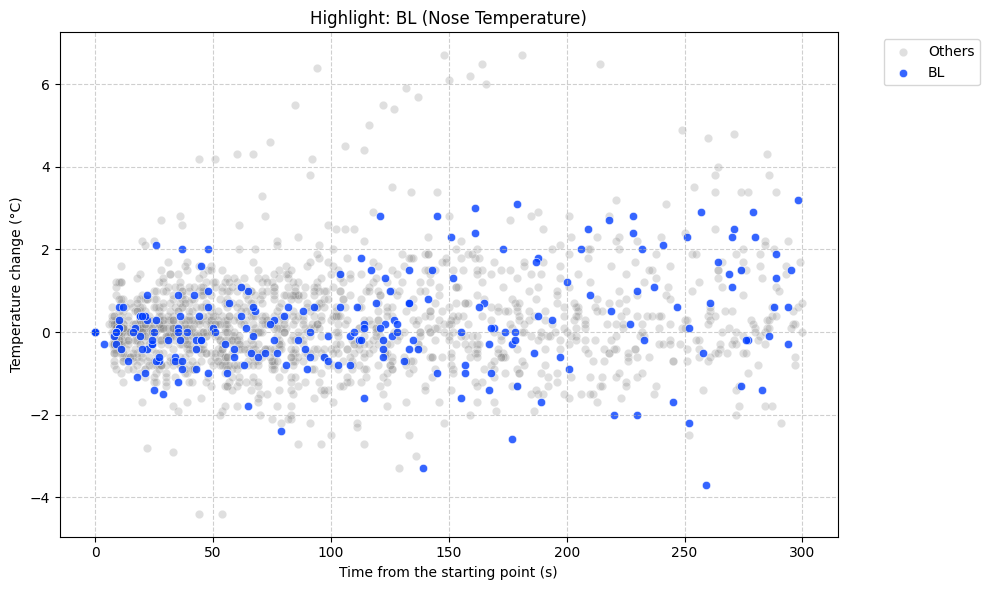

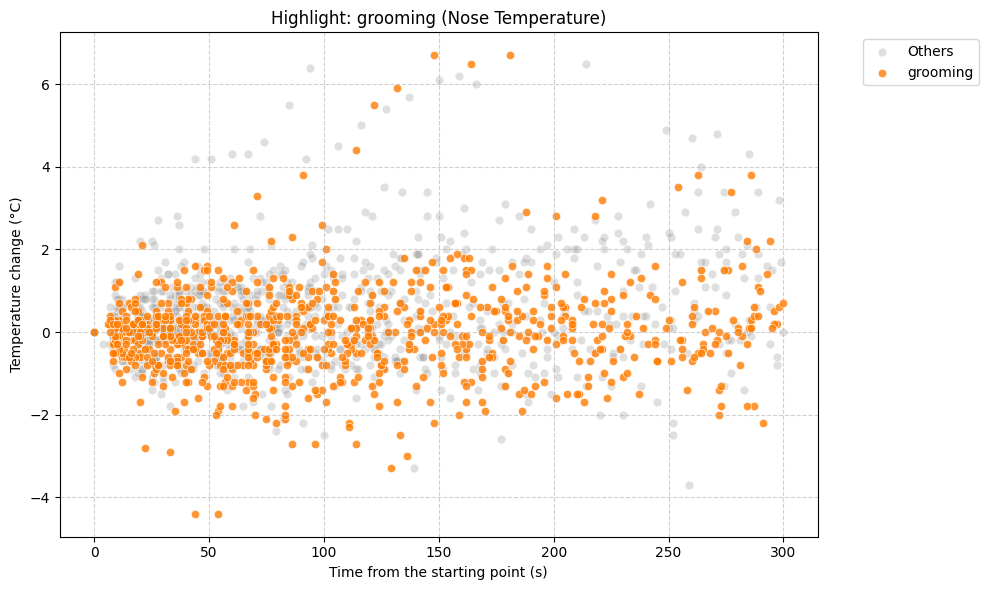

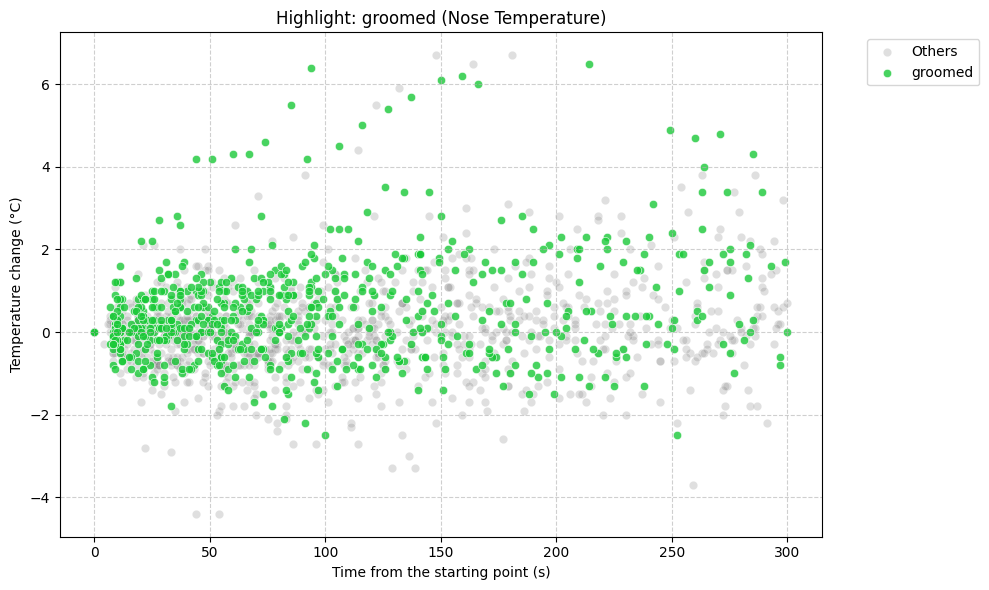

In [8]:
for behavior in delta_df['behavior'].unique():
    self.plot_highlight_behavior(delta_df, target_behavior=behavior, y_column='delta_nose')

### behaviorでの有意差の検証

`('groomed', 'BL')`の場合は、BLでの傾きを基準とした時、groomedでは傾きがどれだけ大きいかが`coef`に格納されている

## 線形混合モデル（使わない）

#### face

In [9]:
# 1. grooming vs BL
res1 = linear.test_behavior_pair_comparison(delta_df, 'grooming', 'BL', y_column='delta_face')

# 2. groomed vs BL
res2 = linear.test_behavior_pair_comparison(delta_df, 'groomed', 'BL', y_column='delta_face')

# 3. grooming vs groomed
res3 = linear.test_behavior_pair_comparison(delta_df, 'grooming', 'groomed', y_column='delta_face')


========== Pairwise Comparison: grooming vs BL (delta_face) ==========
Comparison: grooming と BL の傾きの差
Interaction Coef (Diff in Slope): -0.001613
P-value: 0.0008
---------------------------------------------------------
結果: ★ 有意な差があります。
---------------------------------------------------------

========== Pairwise Comparison: groomed vs BL (delta_face) ==========
Comparison: groomed と BL の傾きの差
Interaction Coef (Diff in Slope): -0.000154
P-value: 0.7571
---------------------------------------------------------
結果: 有意な差は認められませんでした。
---------------------------------------------------------

========== Pairwise Comparison: grooming vs groomed (delta_face) ==========
Comparison: grooming と groomed の傾きの差
Interaction Coef (Diff in Slope): -0.001465
P-value: 0.0000
---------------------------------------------------------
結果: ★ 有意な差があります。
---------------------------------------------------------


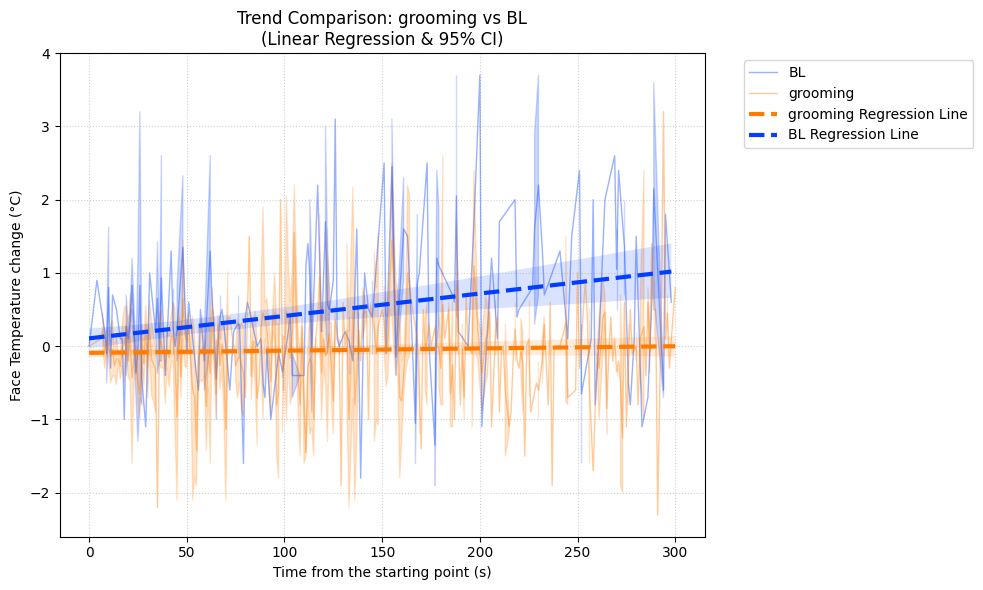

In [10]:
linear.plot_behavior_trend_comparison(delta_df, 'grooming', 'BL', y_column='delta_face')

C:\Users\yyu33\Downloads\Monkey_Aggression\groom\aim1.py:214: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\yyu33\Downloads\Monkey_Aggression\groom\aim1.py:226: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


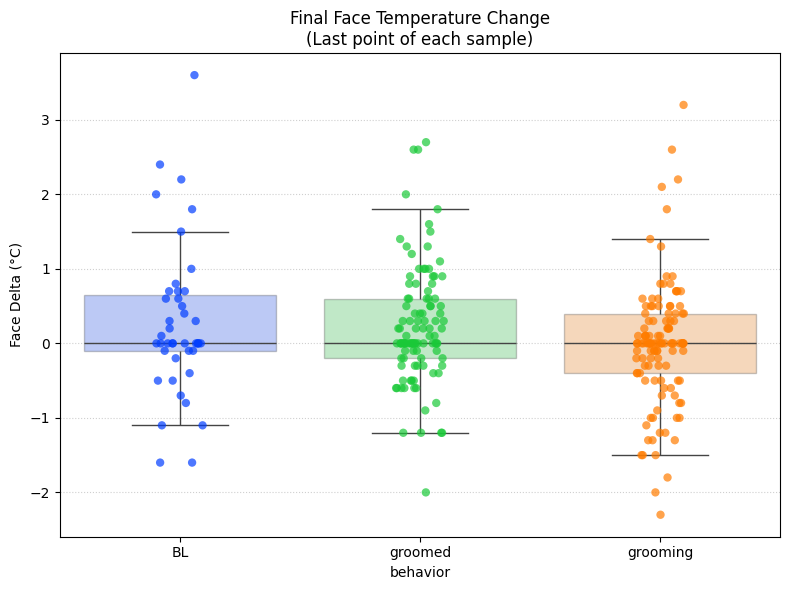

In [11]:
linear.plot_final_delta_comparison(delta_df, y_column='delta_face')

#### nose

In [12]:
# 1. grooming vs BL
res1 = linear.test_behavior_pair_comparison(delta_df, 'grooming', 'BL', y_column='delta_nose')

# 2. groomed vs BL
res2 = linear.test_behavior_pair_comparison(delta_df, 'groomed', 'BL', y_column='delta_nose')

# 3. grooming vs groomed
res3 = linear.test_behavior_pair_comparison(delta_df, 'grooming', 'groomed', y_column='delta_nose')


========== Pairwise Comparison: grooming vs BL (delta_nose) ==========
Comparison: grooming と BL の傾きの差
Interaction Coef (Diff in Slope): 0.000183
P-value: 0.7605
---------------------------------------------------------
結果: 有意な差は認められませんでした。
---------------------------------------------------------

========== Pairwise Comparison: groomed vs BL (delta_nose) ==========
Comparison: groomed と BL の傾きの差
Interaction Coef (Diff in Slope): 0.002856
P-value: 0.0000
---------------------------------------------------------
結果: ★ 有意な差があります。
---------------------------------------------------------

========== Pairwise Comparison: grooming vs groomed (delta_nose) ==========
Comparison: grooming と groomed の傾きの差
Interaction Coef (Diff in Slope): -0.002664
P-value: 0.0000
---------------------------------------------------------
結果: ★ 有意な差があります。
---------------------------------------------------------
